#  NLP unassessed exercises: This notebook is based on sklearn's tutorial 'Working with Text Data' with some extras and exercises

In [1]:
import sklearn

In [2]:
categories = ['alt.atheism', 'soc.religion.christian',
              'comp.graphics', 'sci.med']

In [3]:
#Loading the 20 Newsgroups dataset
from sklearn.datasets import fetch_20newsgroups
from matplotlib import pyplot as plt

In [4]:
# with a random seed, always keep it the same number each time
# for reproducibility (here 42 (=the meaning of life...))
twenty_train = fetch_20newsgroups(subset='train',categories=categories, 
                                  shuffle=True, random_state=42)

In [5]:
#fetch_20newsgroups puts the data in the .data attribute
len(twenty_train.data)

2257

In [6]:
# Let's have a look at the first text in the collection
print("\n".join(twenty_train.data[0].split("\n")))

From: sd345@city.ac.uk (Michael Collier)
Subject: Converting images to HP LaserJet III?
Nntp-Posting-Host: hampton
Organization: The City University
Lines: 14

Does anyone know of a good way (standard PC application/PD utility) to
convert tif/img/tga files into LaserJet III format.  We would also like to
do the same, converting to HPGL (HP plotter) files.

Please email any response.

Is this the correct group?

Thanks in advance.  Michael.
-- 
Michael Collier (Programmer)                 The Computer Unit,
Email: M.P.Collier@uk.ac.city                The City University,
Tel: 071 477-8000 x3769                      London,
Fax: 071 477-8565                            EC1V 0HB.



In [7]:
# Extracting features from text data
# Make sure you read the part of the tutorial/lecture about the bags of words
# representation

In [8]:
# A vectorizer is used to extract features from each item in the dataset
from sklearn.feature_extraction.text import CountVectorizer

# create a count vectorizer, which by default does some pre-processing
# tokenize (into single words/unigrams) + lower-casing
# to change these default settings look at the sklearn documentation
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(twenty_train.data)

In [9]:
# let's see how many features we extracted (vocab size) using the CountVectorizer
print (len(count_vect.get_feature_names()))

35788


In [10]:
# let's see what is at position 15000 in the global vocab/feature vector
print (count_vect.get_feature_names()[15000])

furnace


In [11]:
# CountVectorizer has extracted all the features for all the docs from the data
# putting them into a matrix of dimensions #instances * #features
X_train_counts.shape

(2257, 35788)

In [12]:
# To see the index of a specific word, you can use the following
count_vect.vocabulary_.get(u'algorithm')

4690

In [13]:
# With the index a look at what's in the first row/document (see printout above)
# This should be the bag of words representation for the instance
first_row = X_train_counts[0].toarray()[0]
for i in range(len((list(first_row)))):
    # only look at elements that are non-0
    if first_row[i] >0:
        # print out the index of the feature, the feature name (i.e. the word), count
        print(i, count_vect.get_feature_names()[i], first_row[i])

177 071 2
230 0hb 1
587 14 1
2326 477 2
3062 8000 1
3166 8565 1
4017 ac 2
4378 advance 1
4808 also 1
5195 any 1
5201 anyone 1
5285 application 1
8696 city 4
9031 collier 3
9338 computer 1
9801 convert 1
9805 converting 2
9932 correct 1
12014 do 1
12051 does 1
12541 ec1v 1
12833 email 2
14085 fax 1
14281 files 2
14676 format 1
14887 from 1
15576 good 1
15837 group 1
16082 hampton 1
16881 host 1
16916 hp 2
16927 hpgl 1
17302 iii 2
17366 images 1
17389 img 1
17556 in 1
18268 into 1
18474 is 1
19458 know 1
19780 laserjet 2
20198 like 1
20253 lines 1
20459 london 1
21661 michael 3
23122 nntp 1
23610 of 1
23915 organization 1
24651 pc 1
24677 pd 1
25337 please 1
25361 plotter 1
25663 posting 1
26175 programmer 1
27836 response 1
28619 same 1
29022 sd345 1
30623 standard 1
31077 subject 1
31915 tel 1
32116 tga 1
32135 thanks 1
32142 the 5
32270 this 1
32391 tif 1
32493 to 4
33256 uk 2
33572 unit 1
33597 university 2
33915 utility 1
34755 way 1
34775 we 1
35312 would 1
35416 x3769 1


# Feature Weighing (beyond raw counts)
For many if not most applications, it is better to WEIGH terms wrt a document instead of simply COUNT their frequencies. This can be done using one of the weighing methods: MI, TFIDF, IG, all of which are implemented in scikit-learn

In [14]:
# For instance, to compute document vector representations in which 
# words are weighed using TFiDF, you can use TfidfTransformer
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer()

In [15]:
# fit and transform the training data with TF-IDF counts 
# Don't worry too much about the method for now, we will come back to it
# later in the module, but see the counts have been smoothed
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(2257, 35788)

In [16]:
# let's see how the counts have been turned into weights
first_row = X_train_tfidf[0].toarray()[0]
for i in range(len((list(first_row)))):
    # only look at elements which are non-0
    # notice these values are 'smoothed' from the raw counts
    if first_row[i] >0:
        print(i, count_vect.get_feature_names()[i], first_row[i])

177 071 0.25612026239119895
230 0hb 0.1348710554299733
587 14 0.05966162012870271
2326 477 0.24645540709354397
3062 8000 0.10783602957370853
3166 8565 0.1348710554299733
4017 ac 0.12491817585060791
4378 advance 0.0686611288079694
4808 also 0.03900412426100995
5195 any 0.0310951485922154
5201 anyone 0.04316199700711876
5285 application 0.08413454409085573
8696 city 0.314400065528974
9031 collier 0.3841803935867984
9338 computer 0.049671845493333165
9801 convert 0.07830787326179856
9805 converting 0.21567205914741705
9932 correct 0.06350565647195339
12014 do 0.031042954435189937
12051 does 0.037793189755988436
12541 ec1v 0.1348710554299733
12833 email 0.125601499991304
14085 fax 0.06666452137859726
14281 files 0.13635772403701527
14676 format 0.07691883385947053
14887 from 0.016797806021219684
15576 good 0.042703686357211466
15837 group 0.05417404179868691
16082 hampton 0.11382738609462074
16881 host 0.0360441471878483
16916 hp 0.17358472047671197
16927 hpgl 0.12322770354677198
17302 iii

# Naive Bayes

In [17]:
# Training a multinomial (beyond 2 class) NB classifier
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_train_tfidf, twenty_train.target)

In [18]:
# Testing on a toy dataset
docs_new = ['God is love', 'OpenGL on the GPU is fast']
X_new_counts = count_vect.transform(docs_new)
X_new_tfidf = tfidf_transformer.transform(X_new_counts)

In [19]:
predicted = clf.predict(X_new_tfidf)
for doc, category in zip(docs_new, predicted):
    print('%r => %s' % (doc, twenty_train.target_names[category]))

'God is love' => soc.religion.christian
'OpenGL on the GPU is fast' => comp.graphics


In [20]:
# A Pipeline is an object that can carry out count extraction, weighting
# and classification all in one go- be careful you know what each part does
from sklearn.pipeline import Pipeline
text_clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', MultinomialNB()),
                    ])

In [21]:
# Proper testing on the full 20newsgroups test set
import numpy as np
twenty_test = fetch_20newsgroups(subset='test', categories=categories, 
                                 shuffle=True, random_state=42)
docs_test = twenty_test.data
text_clf.fit(twenty_train.data, twenty_train.target)
predicted = text_clf.predict(docs_test)

# Evaluation

In [22]:
# Using the metrics package
from sklearn import metrics

# Get a classification report to see overall and per-class performance 
print(metrics.classification_report(twenty_test.target, predicted,
                                    target_names=twenty_test.target_names))

                        precision    recall  f1-score   support

           alt.atheism       0.97      0.60      0.74       319
         comp.graphics       0.96      0.89      0.92       389
               sci.med       0.97      0.81      0.88       396
soc.religion.christian       0.65      0.99      0.78       398

              accuracy                           0.83      1502
             macro avg       0.89      0.82      0.83      1502
          weighted avg       0.88      0.83      0.84      1502



In [23]:
# Confusion matrix
metrics.confusion_matrix(twenty_test.target, predicted)

array([[192,   2,   6, 119],
       [  2, 347,   4,  36],
       [  2,  11, 322,  61],
       [  2,   2,   1, 393]])

In [24]:
# a function to make the confusion matrix readable and pretty
def confusion_matrix_heatmap(y_test, preds, labels):
    """Function to plot a confusion matrix"""
    cm = metrics.confusion_matrix(y_test, preds)
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111)
    cax = ax.matshow(cm)
    plt.title('Confusion matrix of the classifier')
    fig.colorbar(cax)
    ax.set_xticks(np.arange(len(labels)))
    ax.set_yticks(np.arange(len(labels)))
    ax.set_xticklabels( labels, rotation=45)
    ax.set_yticklabels( labels)

    for i in range(len(cm)):
        for j in range(len(cm)):
            text = ax.text(j, i, cm[i, j],
                           ha="center", va="center", color="w")

    plt.xlabel('Predicted')
    plt.ylabel('True')
    
    # fix for mpl bug that cuts off top/bottom of seaborn viz:
    b, t = plt.ylim() # discover the values for bottom and top
    b += 0.5 # Add 0.5 to the bottom
    t -= 0.5 # Subtract 0.5 from the top
    plt.ylim(b, t) # update the ylim(bottom, top) values
    plt.show() # ta-da!
    plt.show()

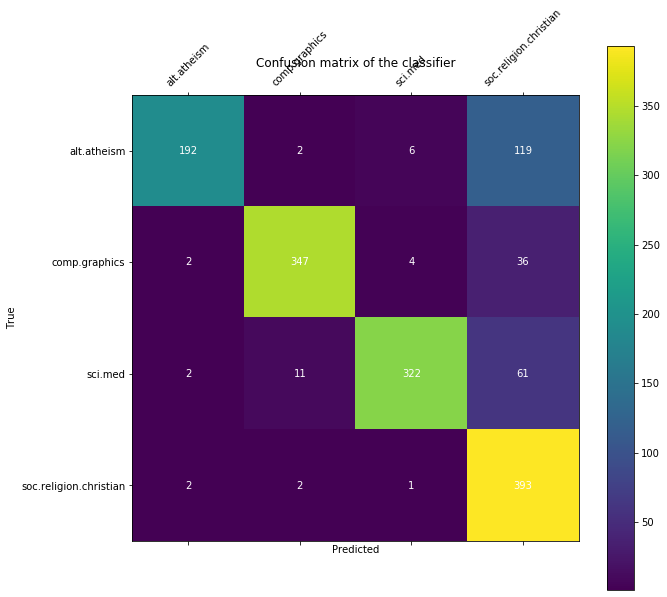

In [25]:
confusion_matrix_heatmap(twenty_test.target, predicted, twenty_test.target_names)

## Interpreting the confusion matrix
A perfect classification of this test set would be all the diagonals having the lightest colour, and everywhere else in the darkest colour (zero confusion/errors). In reality that won't happen with NLP applications worth studying.

Here there are quite a few squares outside the diagonal with moderate numbers. Notice that many alt.atheism documents were classified as soc.religion.christian, hence the lower recall for alt.atheism and lower precision for soc.religion.christian. Quite a few sci-med documents were classified as soc.religion.christian too, again affecting the precision of soc.religion.christian whilst making the recall of sci-med go down a little bit.

In [26]:
# Print out some predictions against the labels
n = 20
for doc, label_idx in zip(docs_test, twenty_test.target):
    label = twenty_train.target_names[label_idx]
    prediction = text_clf.predict([doc])[0]
    print('{0} => {1}, ground truth = {2}'.format(doc, twenty_train.target_names[prediction], label))
    i-=1
    if n <0:
        break
    print('*'*50)
    print()

From: brian@ucsd.edu (Brian Kantor)
Subject: Re: HELP for Kidney Stones ..............
Organization: The Avant-Garde of the Now, Ltd.
Lines: 12
NNTP-Posting-Host: ucsd.edu

As I recall from my bout with kidney stones, there isn't any
medication that can do anything about them except relieve the pain.

Either they pass, or they have to be broken up with sound, or they have
to be extracted surgically.

When I was in, the X-ray tech happened to mention that she'd had kidney
stones and children, and the childbirth hurt less.

Demerol worked, although I nearly got arrested on my way home when I barfed
all over the police car parked just outside the ER.
	- Brian
 => sci.med, ground truth = sci.med
**************************************************

From: rind@enterprise.bih.harvard.edu (David Rind)
Subject: Re: Candida(yeast) Bloom, Fact or Fiction
Organization: Beth Israel Hospital, Harvard Medical School, Boston Mass., USA
Lines: 37
NNTP-Posting-Host: enterprise.bih.harvard.edu

In article

From: wagner@grace.math.uh.edu (David Wagner)
Subject: Re: Deuterocanonicals, esp. Sirach
Organization: UH Dept of Math
Lines: 67

"Larry" == Larry L. Overacker <shellgate!llo@uu4.psi.com> writes:

I, not Dave Davis, wrote:
>
>The deutero-canonical books were added much later in the church's
>history.  They do not have the same spiritual quality as the rest of
>Scripture.  I do not believe the church that added these books was
>guided by the Spirit in so doing.  And that is where this sort of
>discussion ultimately ends.

Sorry, I put my foot in my mouth, concerning the church's history.
It is correct to say that the Council of Hippo 393 listed the 
deuterocanonical books among those accepted for use in the
church, and that this was ratified by the Council of Carthage,
and by Pope Innoent I and Gelasius I (414 AD).

Yet Eerdman's History of the Church says: 

"At the end of the fourth century views still differed in regard to
the extent of the canon, or the number of the books which sh

From: revdak@netcom.com (D. Andrew Kille)
Subject: Re: Question about Virgin Mary
Organization: NETCOM On-line Communication Services (408 241-9760 guest)
Lines: 39

D. Andrew Byler (db7n+@andrew.cmu.edu) wrote:
: However greatly we extoll Mary, it is quite obvious that she is in no
: way God or even part of God or equal to God.  The Assumption of our
: Blessed Mother, meant that because of her close identification with the
: redemptive work of Christ, she was Assumed (note that she did not
: ASCEND) body and soul into Heaven, and is thus one of the few, along
: with Elijah, Enoch, Moses (maybe????) who are already perfected in
: Heaven.  Obviously, the Virgin Mary is far superior in glorification to
: any of the previously mentioned personages.


As I said, it is a provocative thought.

From "Answer to Job":

	The logical consistency of the papal declaration cannot be surpassed
	and it leaves Protestantism with the odium of being nothing but a
	_man's religion_ which allows no metaphy

From: david@stat.com (David Dodell)
Subject: HICN611 Medical News Part 2/4
Reply-To: david@stat.com (David Dodell)
Distribution: world
Organization: Stat Gateway Service, WB7TPY
Lines: 707

------------- cut here -----------------





HICNet Medical Newsletter                                              Page 13
Volume  6, Number 11                                           April 25, 1993



::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
                        Food & Drug Administration News
::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::

              FDA Approves Depo Provera, injectable contraceptive
                      P92-31 Food and Drug Administration
              FOR IMMEDIATE RELEASE Susan Cruzan - (301) 443-3285


The Food and Drug Administration today announced the approval of Depo Provera, 
an injectable contraceptive drug. 

The drug, which contains a synthetic hormone similar to the natural hormone 
prog

From: conan@durban.berkeley.edu (David Cruz-Uribe)
Subject: Re: St. Maria Goretti
Organization: U.C. Berkeley Math. Department.
Lines: 14

After reading this story about St. Maria Goretti (posted two weeks
ago), I am a bit confused.  While it is clear that her daily
life is one of probity and sanctity, I am afraid I don't quite
understand the final episode of her life.  I am reading it 
correctly, she (and the Church apparently) felt that being raped
was a sin on _her_ part, one so perfidious that she would rather
die than commit it.  If this is the case I'm afraid that I 
disagree rather strongly.

Can anyone out there explain this one to me?

Yours in Christ,

David Cruz-Uribe, SFO
 => soc.religion.christian, ground truth = soc.religion.christian
**************************************************

From: crgruen@sony1.sdrc.com (robert gruen)
Subject: Bit Planes
Lines: 12

Could anyone please explain what Bit Planes are?  We have an SGI here at work 
that says it has 64 Bit Planes - wh

From: cs89ssg@brunel.ac.uk (Sunil Gupta)
Subject: MESSAGE: for cgcad@bart.inescn.pt
Organization: Brunel University, Uxbridge, UK
X-Newsreader: TIN [version 1.1 PL8]
Lines: 2

I cant get through to the author of rtrace. His site is inaccessible
can he upload the new version somewhere else please?
 => comp.graphics, ground truth = comp.graphics
**************************************************

From: hall@vice.ico.tek.com (Hal F Lillywhite)
Subject: Re: Mormon temples
Organization: Tektronix Inc., Beaverton, Or.
Lines: 24

In article <May.11.02.38.41.1993.28297@athos.rutgers.edu> mserv@mozart.cc.iup.edu (Mail Server) writes:

>But I am interested in your claim that early Christian practices "parallel" 
>Mormon temple ceremonies.  Could you give an example?  Also, why do they only 
>parallel Mormon ceremonies?  Why don't Mormon ceremonies restore the original 
>Christian practices?  Wasn't that the whole point of Joseph Smith's stated 
>mission?

If you want parallels the best source is

From: hudson@athena.cs.uga.edu (Paul Hudson Jr)
Subject: Re: Homosexuality issues in Christianity
Organization: University of Georgia, Athens
Lines: 11

In article <May.13.02.29.39.1993.1505@geneva.rutgers.edu> revdak@netcom.com (D. Andrew Kille) writes:
> It was the manifestation of the spirit among the gentiles
>that convinced Peter (Acts 10) that his prejudice against them (based on
>scripture, I might add) was not in accordance with God's intentions.

I would just like to point out that the particular command not to eat
or fellowship with Gentiles is not found in the Old Testament.  This
was part of the "hedge built around the law."  It was a part of Peter's
tradition, and not the Scripture.

Link Hudson.
 => soc.religion.christian, ground truth = soc.religion.christian
**************************************************

From: mharring@cch.coventry.ac.uk (MARTIN)
Subject: Ftp Site(s) with GIFS
Nntp-Posting-Host: cc_sysh
Organization: Fire Walk With Me....
Lines: 11

I have been loo

From: shellgate!llo@uu4.psi.com (Larry L. Overacker)
Subject: Re: Mormon temples
Organization: Shell Oil
Lines: 17

In article <May.11.02.38.41.1993.28297@athos.rutgers.edu> mserv@mozart.cc.iup.edu (Mail Server) writes:

>I don't necessarily object to the secrecy but I do question it, since I see no 
>Biblical reason why any aspect of Christian worship should involve secrecy.  

Early in Church history, the catechumens were dismissed prior to the celebration 
of the Eucharist.  It WAS secret, giving rise to the rumors that Christians
were cannibals and all sorts of perverse claims.  The actions were considered
too holy to be observed by non-Christians, as well as potentially dangerous
for the individual Christian who might be identified.

Larry Overacker (llo@shell.com)
-- 
-------
Lawrence Overacker
Shell Oil Company, Information Center    Houston, TX            (713) 245-2965
llo@shell.com
 => soc.religion.christian, ground truth = soc.religion.christian
*****************************

From: bill@twg.bc.ca (Bill Irwin)
Subject: Re: What WAS the immaculate conception
Reply-To: bill@twg.bc.ca (Bill Irwin)
Organization: The Westrheim Group (TWG)
Lines: 53

ragraca@vela.acs.oakland.edu (Randy A. Graca) writes:

:                                                               Consequently,
: this verse indicates that she was without sin.  Also, as was observed at
: the very top of this post, Mary had to be free from sin in order to be the
: mother of Jesus, who was definitely without sin.

If the mother of Jesus had to be without sin in order to give
birth to God, then why didn't Mary's mother have to be without
sin in order to give birth to the perfect vessel for Jesus?  For
that matter, why didn't Mary's grandmother have to be without sin
either?  Seems to me that with all the original sin flowing
through each person, the need for the last one (Mary) to have
none puts God in a box, where we say that He couldn't have
incarnated Himself through a normal human being.

My Go

From: ttrusk@its.mcw.edu (Thomas Trusk)
Subject: Re: Krillean Photography
Organization: Medical College of Wisconsin
Lines: 22
Reply-To: ttrusk@its.mcw.edu
NNTP-Posting-Host: pixel.cellbio.mcw.edu


In article <20APR199315574161@vxcrna.cern.ch> filipe@vxcrna.cern.ch (VINCI) writes:

> How about Kirlian imaging ? I believe the FAQ for sci.skeptics (sp?)
> has a nice write-up on this. They would certainly be most supportive
> on helping you to build such a device and connect to a 120Kvolt
> supply so that you can take a serious look at your "aura"... :-)
>
> Filipe Santos
> CERN - European Laboratory for Particle Physics
> Switzerland

Please sign the relevant documents and forward the remaining parts
to our study 'Effect of 120 Kv on Human Tissue wrapped in Film'.
Thanks for your support...
*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*==*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=
*Dr. Thomas Trusk                    *                              *
*Dept. of Cellular Biology & Anatomy * Email to ttrusk@its.

From: dyer@spdcc.com (Steve Dyer)
Subject: Re: Antihistamine for sleep aid
Organization: S.P. Dyer Computer Consulting, Cambridge MA

In article <1993Apr29.052044.23918@nmt.edu> houle@nmt.edu (Paul Houle) writes:
>	Anyway,  I am looking for advice for the use of
>antihistamines as sleep aids,  and if there are any dangers of such use
>(Seems safe to me since they are used chronically for allergies by
>millions).  I don't want to try BZs,  because BZ addiction seems to be
>a serious threat,  and from what I hear,  BZ sleep quality is not good,
>whereas antihistamine sleep quality seems to be better for me.  I have
>tried some dietary tryptophan loading stuff,  and that also seems to
>lower sleep quality,  I seem to wake up around 4:00 or so and be in some
>kind of mental haze until 7:00 or 8:00.  Also,  I would be interested in
>any other advice for helping my problem.  (Although I've already tried
>many of the non-pharmacological solutions)

Well, I think you might want to visit a doct

From: biz@soil.princeton.edu (Dave Bisignano)
Subject: Re: Why do people become atheists?
Reply-To: biz@soil.princeton.edu
Organization: Princeton University
Lines: 11

In article <May.9.05.41.56.1993.27583@athos.rutgers.edu>, gt7122b@prism.gatech.edu (Randal Lee Nicholas Mandock) writes:
| Bob reminds me of my roommate.  In order to disbelieve atheism, he says 
| he will need to be proven wrong about it.  Well, I don't even waste 
| my time trying.  I tell him that he'll just have to take my word for it. 
| In response, he tells me he will say an "atheist's prayer" for me. 



Who is the "atheist's prayer" being said to?

 
 => soc.religion.christian, ground truth = soc.religion.christian
**************************************************

From: decay@cbnewsj.cb.att.com (dean.kaflowitz)
Subject: Re: Origins of the bible.
Organization: AT&T
Distribution: na
Keywords: bible
Lines: 21

In article <1993Apr19.141112.15018@cs.nott.ac.uk>, eczcaw@mips.nott.ac.uk (A.Wainwright) writes:
> Hi,


From: pduggan@world.std.com (Paul C Duggan)
Subject: Re: hate the sin...
Organization: The World Public Access UNIX, Brookline, MA
Lines: 30

In article <May.12.04.27.07.1993.9920@athos.rutgers.edu> scott@prism.gatech.edu (Scott Holt) writes:
>Hate begets more hate, never love. Consider some sin. I'll leave it unnamed
>since I don't want this to digress into an argument as to whether or not 
>something is a sin. Now lets apply our "hate the sin..." philosophy and see
>what happens. If we truly hate the sin, then the more we see it, the 
>stronger our hatred of it will become. Eventually this hate becomes so 
>strong that we become disgusted with the sinner and eventually come to hate
>the sinner.

Though you can certaily assert all this, I don't see why it necessarily
has to be the case. Why can't hate just stay as it is, and not beget more?
Who says we have to get disgusted and start hating the sinner. I admit
this happens, but I donlt think you can say it is always necessaily
so.

Wh

From: mls@panix.com (Michael Siemon)
Subject: Re: ARSENOKOITAI: NT Meaning of
Organization: Panix Public Access Internet & Unix, NYC
Lines: 210


			    Conviction of Sin

		A meta-exegetical or methodological essay


In article <May.14.02.10.06.1993.25123@athos.rutgers.edu>
REXLEX@fnal.fnal.gov writes:

>I can't post it all at once, so it will come piece meal and not daily.

I look forward to reading it.  When I got to the library last week, it
was with the object in view to look at some articles that have appeared
over the last few years, since my previous look at the literature.  Un-
fortunately, they had moved the journal back-issues, so I didn't get a
look at the articles I was hoping to find.  I will continue to reserve
my own judgment on _arsenokoitai_ until I have seen the latest scholarly
work, and I can hope that REXLEX's posting may give some meat to chew on.

However, what I *can* do now, is to point out the methodological issues
-- what needs to be shown for anything to be

From: whitsebd@nextwork.rose-hulman.edu (Bryan Whitsell)
Subject: Re: Satan and TV
Reply-To: whitsebd@nextwork.rose-hulman.edu
Organization: News Service at Rose-Hulman
Lines: 14

In article <May.9.05.41.06.1993.27543@athos.rutgers.edu>  
salaris@niblick.ecn.purdue.edu (Rrrrrrrrrrrrrrrabbits) writes:
> MTV controls what bands are popular, no matter how bad they are.  In fact, it is  
>better to be politically correct - like U2, Madonna - than to have any musical  
>talent. 
> Steven C. Salaris                
 
Interesting idea.  
Regular televeision seems to do this sort of thing too with politically correct  
shows.


In Christ's Love
Bryan 
 => soc.religion.christian, ground truth = soc.religion.christian
**************************************************

From: gt7122b@prism.gatech.edu (Randal Lee Nicholas Mandock)
Subject: Re: homosexual issues in Christianity
Organization: Georgia Institute of Technology
Lines: 21

In response to alleged circular reasoning concerning the morality

From: tgl+@cs.cmu.edu (Tom Lane)
Subject: JPEG image compression: Frequently Asked Questions
Summary: Useful info about JPEG (JPG) image files and programs
Keywords: JPEG, image compression, FAQ
Supersedes: <jpeg-faq_735169170@g.gp.cs.cmu.edu>
Nntp-Posting-Host: g.gp.cs.cmu.edu
Reply-To: jpeg-info@uunet.uu.net
Organization: School of Computer Science, Carnegie Mellon
Expires: Mon, 31 May 1993 03:14:50 GMT
Lines: 1034

Archive-name: jpeg-faq
Last-modified: 2 May 1993

This FAQ article discusses JPEG image compression.  Suggestions for
additions and clarifications are welcome.

New since version of 18 April 1993:
  * New version of XV supports 24-bit viewing for X Windows.
  * New versions of DVPEG & Image Alchemy for DOS.
  * New versions of Image Archiver & PMView for OS/2.
  * New listing: MGIF for monochrome-display Ataris.


This article includes the following sections:

[1]  What is JPEG?
[2]  Why use JPEG?
[3]  When should I use JPEG, and when should I stick with GIF?
[4]  How wel

From: cesws@cc.newcastle.edu.au
Subject: patches for SUNGKS4.1 ?
Lines: 17
Organization: University of Newcastle, AUSTRALIA




Due to a number of bugs in GKS4.1 under SUNOS 4.1.3, I installed
patches 100533-15 and 100755-01. Patch 100533-15 appears to
work fine and has fixed a number of problems. Patch 100755-01,
however, which is required to fix a number of other annoying
bugs, breaks with our applications.

Is there a more recent revision of patch 10075?

Any other ideas?

Scott Sloan                      email   cesws@cc.newcastle.edu.au
University of Newcastle          fax     +61 49 216991
NSW
Australia
 => comp.graphics, ground truth = comp.graphics
**************************************************

From: fechter@enzian.gris.informatik.uni-tuebingen.de (Juergen Fechter)
Subject: Alpha Kubota Graphic vs. SGI
Organization: InterNetNews at ZDV Uni-Tuebingen
Lines: 16
NNTP-Posting-Host: enzian.gris.informatik.uni-tuebingen.de


Who has experience with porting a GL-program to an Alp

From: s127@ii.uib.no (Torgeir Veimo)
Subject: C++ classes for graphics
Organization: Institutt for Informatikk UIB Norway
Lines: 16

I'm planning on writing several classes to build a raytracing/radiosity library
on top of, and i'm wondering if anythink like this is freely available on the
net before i go to it. What i need is classes like rays, vectors, colors,
shaders, surfaces, media, primitives, worlds (containing primitives) and
views/images.

Please post or mail.
-- 
Torgeir Veimo

Studying at the University of Bergen

"...I'm gona wave my freak flag high!" (Jimi Hendrix)

"...and it would be okay on any other day!" (The Police)

 => comp.graphics, ground truth = comp.graphics
**************************************************

From: ceci@lysator.liu.se (Cecilia Henningsson)
Subject: Q: Repelling wasps?
Summary: How do I repel wasps?
Keywords: wasp
Organization: Lysator ACS at Linkoping University
Lines: 43

(This is a cross post to rec.gardens and sci.med. Set the follow-up
(lin

From: lisa@ux1.lbl.gov (lisa stewart)
Subject: Christian Embassy in DC
Reply-To: lisa@ux1.lbl.gov
Organization: Lawrence Berkeley Laboratory
Lines: 6

Does anyone know about the Christian Embassy in Washington DC? What
exactly does it do?

Please respond to lisa@ux1.lbl.gov

Thanks
 => comp.graphics, ground truth = soc.religion.christian
**************************************************

From: csfed@uxa.ecn.bgu.edu (Frank Doss)
Subject: Re: Science and theories
Organization: Educational Computing Network
Lines: 27
NNTP-Posting-Host: uxa.ecn.bgu.edu

In article <C5u7Bq.J43@news.cso.uiuc.edu> cobb@alexia.lis.uiuc.edu (Mike Cobb) writes:

>The examples he gave were quarks and continental plates.  Are there 

Sounds like more of the same.  Gods were used to describe almost
everything in the past.  As we come to understand the underpinnings of
more and more, the less we credit to a god.  Now, the not-so-well
understood elements (at least by the author) includes quarks and tectonic
drift.  

From: banschbach@vms.ocom.okstate.edu
Subject: Re: Candida(yeast) Bloom, Fact or Fiction
Lines: 64
Nntp-Posting-Host: vms.ocom.okstate.edu
Organization: OSU College of Osteopathic Medicine

In article <1rhb58$9cf@hsdndev.harvard.edu>, rind@enterprise.bih.harvard.edu (David Rind) writes:
> In article <1993Apr26.103242.1@vms.ocom.okstate.edu>
>  banschbach@vms.ocom.okstate.edu writes:
>>are in a different class.  The big question seems to be is it reasonable to 
>>use them in patients with GI distress or sinus problems that *could* be due 
>>to candida blooms following the use of broad-spectrum antibiotics?
> 
> I guess I'm still not clear on what the term "candida bloom" means,
> but certainly it is well known that thrush (superficial candidal
> infections on mucous membranes) can occur after antibiotic use.
> This has nothing to do with systemic yeast syndrome, the "quack"
> diagnosis that has been being discussed.
> 
> 
>>found in the sinus mucus membranes than is candida.  Women have

From: ressler@cougar.jpl.nasa.gov   (Mike Ressler)
Subject: STOP THIS ARGUMENT! XV-3.00 is 24-bit! (was Re: Oh make up your...)
Organization: Jet Propulsion Lab - Mid-Infrared Camera Project
Lines: 13
NNTP-Posting-Host: cougar.jpl.nasa.gov

STOP! STOP! STOP! STOP! This argument is getting silly! XV-3.00 now handles
24-bit images without quantizing them. All these arguments are moot, null, 
and void. Please stop quibbling about a now obsolete version of the program.

Besides, you can now generate tons of verbiage about the new shareware
licensing it uses instead ...

Mike
--
     Mike Ressler - Infrared Photon Jockey     ressler@cougar.jpl.nasa.gov
		       ... less science by dead guys ...
  MS-DOS 4.01 -> MS-DOS 4.01 + Windoze -> DR-DOS 6.0 -> OS/2 2.0 -> Linux + X
	 ... finally getting something useful done with my pet 386 ...
 => comp.graphics, ground truth = comp.graphics
**************************************************

From: livesey@solntze.wpd.sgi.com (Jon Livesey)
Subject: Re

From: sean@aries.scs.uiuc.edu (Sean Murphy)
Subject: Hallusion info??
Summary: Hallusion info?
Keywords: hallusion, 3d
Organization: University of Illinois at Urbana
Lines: 5

Has anyone seen hallusions?  You can buy a poster of them and it looks like a simple dot pattern
when you first look at it but if you focus behind it you see a 3d picture.  I'm looking for
a program that generates these pictures.  There's a company in Texas that makes them but I 
doubt if they're giving the program away.  Any help would be appreciated. 

 => comp.graphics, ground truth = comp.graphics
**************************************************

From: nabil@cae.wisc.edu (Nabil Ayoub)
Subject: Re: Monophysites and Mike Walker
Organization: U of Wisconsin-Madison College of Engineering
Lines: 47

In article <May.9.05.38.52.1993.27378@athos.rutgers.edu> our moderator
comments :

>Chalcedon was a compromise between two groups, the Alexandrians and
>Antiochenes.  It adopted language that was intended to be acce

From: halat@panther.bears (Jim Halat)
Subject: Re: After 2000 years, can we say that Christian Morality is
Reply-To: halat@panther.bears (Jim Halat)
Lines: 129

In article <930419.104739.2t8.rusnews.w165w@mantis.co.uk>, mathew@mantis.co.uk (mathew) writes:
>mccullou@snake2.cs.wisc.edu (Mark McCullough) writes:
>>In article <30136@ursa.bear.com> halat@pooh.bears (Jim Halat) writes:
>>>Atoms are not objective.  They aren't even real.  What scientists call
>>>an atom is nothing more than a mathematical model that describes 
>>>certain physical, observable properties of our surroundings.  All
>>>of which is subjective.  
>> 
>> This deserves framing.  It really does.  "[Atoms] aren't even real."
>> 
>> Tell me then, those atoms we have seen with electron microscopes are
>> atoms now, so what are they?  Figments of our imaginations?  The
>> evidence that atoms are real is overwhelming, but I won't bother with
>> most evidence at the moment.
>
>HA HA HA!
>
>Sorry, but having studied cell bio

From: st2c9@jane.uh.edu (Pou Lee: The MUG@UH Fellow)
Subject: More ODB Catchy Sayings
Reply-To: st2c9@jane.uh.edu
Organization: University of Houston
Lines: 297

Quotes from Our Daily Bread

Our Daily Bread is a devotional help for spiritual growth. One can spend some
ten to fifteen minutes at most reading the daily portion of scriptures and a
related short article that brings the scriptures alive in applying in today's
society. It ends with a saying at the bottom. This article is a collection
of these sayings.

Our Daily Bread is one of the many ministries/services provided by Resources for
Biblical Communication. It is FREE. To receive the literature, just write and
ask for it. The contact addresses are listed below. Write to Radio Bible Class.

Copyright 1989 Radio Bible Class, Grand Rapids, Michigan 49555-0001

Canada: Box 1622, Windsor, Ontario N9A 6Z7
Australia: Box 365, Ryde, 2112 NSW
Europe: Box 1, Carnforth, Lancs., England LA5 9ES
Africa: Box 1652, Manzini, Swaziland
Africa: 

From: mayne@pipe.cs.fsu.edu (William Mayne)
Subject: Re: Christian Morality is
Organization: Florida State University Computer Science Department
Reply-To: mayne@cs.fsu.edu
Lines: 15

In article <1993Apr21.184959.9451@dcs.warwick.ac.uk> simon@dcs.warwick.ac.uk (Simon Clippingdale) writes:
>
>Dan, I'm concerned that you are in grave spiritual danger because of your
>stubborn refusal to love and accept into your heart the Mighty Invisible
>Pink Unicorn...[Nice parody deleted.]

>I shall pray for you. In fact, brother, I cast out the demon which binds you
>in the Name of the Mighty Invisible Pink Unicorn. Dan, you must have *faith*!

Then you better pray for me, too, because I believe that the Mighty
Invisibile Pink Unicorn does not exist. One being cannot be both "Pink"
and "Invisible." The demon (or should that be daemon?) that keeps me
from believing and saving my soul is named Logic.

Bill Mayne
 => soc.religion.christian, ground truth = alt.atheism
***********************************

From: ron.roth@rose.com (ron roth)
Subject: FREQUENT NOSEBLEEDS
X-Gated-By: Usenet <==> RoseMail Gateway (v1.70)
Organization: Rose Media Inc, Toronto, Ontario.
Lines: 73

A >  From some of the replies to my original posting, it's evident that some
A >  people do not secrete enough mucous to keep their nose lining protected
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^            
 Include small amounts of hot, spicy foods with your meals. It's
 not a cure, but many people find it helpful to create extra mucus.
 You may also consider taking a few drops of iodine in juice or water 
 (consult your doctor first!), which is available OTC in Canada.
 If you have a sedentary lifestyle, exercising sometimes helps.

A >  from environmental influences (ie, dry air). But I've had no responses
A >  from anyone with experience with Rutin. Is there another newsgroup that
                      ^^^^^^^^^^^^^^^^^^^^^
A >  might have specifics on herbal remedies?
A > 
A >  Robert Allison

 I tried to e-mail

From: pww@spacsun.rice.edu (Peter Walker)
Subject: Re: Christian Morality is
Organization: I didn't do it, nobody saw me, you can't prove a thing.
Lines: 47

In article <4963@eastman.UUCP>, dps@nasa.kodak.com (Dan Schaertel,,,)
wrote:
> 
> 
> The life , death, and resurection of Christ is documented historical fact. 

Not by any standard of history I've seen. Care to back this up, sans the
lies apologists are so fond of?

> However all the major events of the life
> of Jesus Christ were fortold hundreds of years before him.  Neat trick uh?

Not really. Most of the prophesies aren't even prophesies. They're prayers
and comments taken from the Torah quite out of context. Seems Xians started
lying right from the beginning.

> 
> There is no way to get into a sceptical heart.  You can not say you have given a 
> sincere effort with the attitude you seem to have.

My we're an arrogant ass, aren't we?

> You must TRUST, not just go 
> to church and participate in it's activities. 

You're wr

# Using a different learning algorithm: SVMs

In [27]:
from sklearn.linear_model import SGDClassifier

# NOTE the loss function ‘hinge’ for the SGDClassifier gives a linear SVM.
text_clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', SGDClassifier(loss='hinge', penalty='l2',
                                           alpha=1e-3, random_state=42,
                                           max_iter=5, tol=None)),
                    ])

In [28]:
text_clf.fit(twenty_train.data, twenty_train.target)
predicted = text_clf.predict(docs_test)

In [29]:
print(metrics.classification_report(twenty_test.target, predicted,
                                    target_names=twenty_test.target_names))

                        precision    recall  f1-score   support

           alt.atheism       0.95      0.80      0.87       319
         comp.graphics       0.87      0.98      0.92       389
               sci.med       0.94      0.89      0.91       396
soc.religion.christian       0.90      0.95      0.93       398

              accuracy                           0.91      1502
             macro avg       0.91      0.91      0.91      1502
          weighted avg       0.91      0.91      0.91      1502



## Interpreting improvement
Note how the overall P, R and F1 accuracy has improved and alt.atheism and soc.religion.christian have particularly improved. comp.graphics has not improved.

In [30]:
# Confusion matrix
metrics.confusion_matrix(twenty_test.target, predicted)

array([[256,  11,  16,  36],
       [  4, 380,   3,   2],
       [  5,  35, 353,   3],
       [  5,  11,   4, 378]])

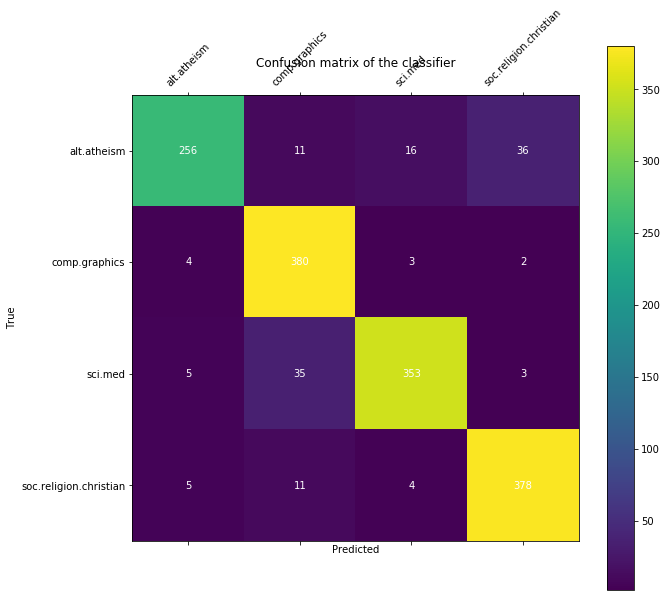

In [31]:
confusion_matrix_heatmap(twenty_test.target, predicted, twenty_test.target_names)

## Interpretation of confusion matrix
The confusion matrix shows the reduction of confusions of alt.atheism with soc.religion.christian and the reduction of sci.med documents being classified as soc.religion.christian.

# Exercise 1: Logistic Regression
Run the whole classification experiment again, copying and pasting from above, but using the Logistic Regression classifier.



In [32]:
from sklearn.linear_model import LogisticRegression

# Exercise 2: Error analysis of False Positives

Performing error analyses is a key part of improving your NLP applications. 

Iterate over the twenty_test.data and, using the list of predictions and labels, print out all the instances where there is a false positive for that class in the sequence (i.e. a false positive is where the label is predicted for a given instance, but this is not the corresponding ground truth label). Format the printed sequences to make it as clear as possible where the error is in the sequence for a given label. 

HINT: This may be achieved most easily by editing the cell above beginning with the comment `# Print out some predictions against the labels`.

For each class's False Positives, think about which features could be added to reduce the number of these errors. The idea is to try to understand where and why the classify mistakenly classifies something as a certain class when it is not of that class. Think about trying some ways to get rid of these errors based on extra features (meta-features like document length, different types of pre-processing, feature extraction etc.).

# Exercise 3: Error analysis of False Negatives
Do the same as in Exercise 2 but for false negatives (note the incorrect predictions will be the same as in exercise 2, but identifying the classes for which this will be an error will be different). 

For each class's False Negatives, think about which features could be added to reduce the number of these errors.  The idea is to try to understand where and why the classify mistakenly misses something as being of a certain class.